第一步：查看数据基本信息
数据特征有哪些，数据基本类型，每个数据的意义是什么
查缺失值


In [21]:
import pandas as pd
import numpy as np

df_tr=pd.read_csv('train.csv')
df_tr

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [22]:
#初步观察
df_tr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [23]:
df_tr.head(10)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4
5,5,0,0,0.00,0,1.000635,13552875.92,NaN,NaN,0.999779,1962.72,1.000635,5647.65,1.0,6.779432,0,0_0_5
6,6,0,0,969969.40,1,1.000115,3647503.98,NaN,NaN,0.999506,6663.16,1.000283,3810.48,1.0,-2.499819,0,0_0_6
7,7,0,0,9412959.10,1,0.999818,21261245.87,NaN,NaN,0.999741,5139.20,1.000130,2570.60,1.0,-1.959801,0,0_0_7
8,8,0,0,2394875.85,1,0.999916,9473209.08,NaN,NaN,0.999022,52011.60,1.000041,2169.36,1.0,-5.970001,0,0_0_8
9,9,0,0,3039700.65,-1,1.000969,6248958.45,NaN,NaN,0.999354,6191.00,1.000646,6199.00,1.0,7.970333,0,0_0_9


In [24]:
df_tr.tail(15)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5237965,185,480,540,3018493.53,-1,1.000057,2.723894e+07,0.997937,0.998915,1.000029,29442.40,1.000301,225663.69,1.000061,-7.209778,26454,480_540_185
5237966,186,480,540,2106025.88,-1,0.999780,1.988346e+07,0.998713,0.998713,0.999780,174758.40,0.999933,516941.19,0.999819,-9.809732,26454,480_540_186
5237967,187,480,540,3791745.66,1,0.999641,3.380628e+07,1.000641,1.000564,0.999564,24031.50,0.999641,73788.88,0.999583,0.289679,26454,480_540_187
5237968,188,480,540,18930.38,-1,0.999741,6.465049e+06,0.999741,0.999741,0.999741,117186.86,1.000297,217260.00,0.999936,-0.699758,26454,480_540_188
5237969,189,480,540,956757.96,1,1.000715,3.710938e+07,1.001167,1.001054,1.000602,788361.12,1.000715,49599.20,1.000708,6.959438,26454,480_540_189
5237970,190,480,540,466320.15,-1,0.999295,3.929472e+07,0.998983,0.999139,0.999295,19725.86,0.999451,169105.20,0.999311,-0.470281,26454,480_540_190
5237971,191,480,540,36937785.44,1,0.995983,6.083261e+08,0.999086,0.997746,0.995913,84744.00,0.995983,48025.00,0.995958,0.799894,26454,480_540_191
5237972,192,480,540,67162.62,1,1.000762,1.179008e+07,1.000834,1.000762,1.000545,168412.86,1.000762,69841.50,1.000698,-1.729727,26454,480_540_192
5237973,193,480,540,6500948.04,1,1.001599,8.035753e+07,1.002908,1.002326,1.001454,413142.24,1.001599,363532.53,1.001531,-3.880262,26454,480_540_193
5237974,194,480,540,262271.52,-1,1.001504,3.922295e+06,1.000677,1.000677,1.001504,20829.20,1.001917,139637.49,1.001557,4.839897,26454,480_540_194


In [25]:
df_tr.isnull().head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


In [26]:
stock0=df_tr[df_tr["stock_id"]==0]
stock0.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
191,0,0,10,1299772.70,1,1.000026,15261106.63,NaN,NaN,0.999812,13996.50,1.000026,23519.16,0.999892,0.389814,1,0_10_0
382,0,0,20,1299772.70,1,0.999919,15261106.63,NaN,NaN,0.999812,4665.50,0.999919,12131.60,0.999842,4.220009,2,0_20_0
573,0,0,30,1299772.70,1,1.000133,15261106.63,NaN,NaN,1.000026,55998.00,1.000133,46203.30,1.000085,5.450249,3,0_30_0
764,0,0,40,1218204.43,1,1.000455,15342674.90,NaN,NaN,1.000241,14655.95,1.000455,26610.45,1.000317,3.169775,4,0_40_0


In [27]:
def inspect_columns(df):
    result=pd.DataFrame({
        'unique':df.nunique()==len(df), 
        'cardinality': df.nunique(),#返回不同值的个数
        'with_null': df.isna().any(),
        'null_pct': round((df.isnull().sum() / len(df))*100,2),#空值的比例
        '1st_row': df.iloc[0],#第一行
        'random_row': df.iloc[np.random.randint(low=0, high=len(df))],
        'last_row': df.iloc[-1],
        'dtype': df.dtypes #每一行的类型
    })
    return result
inspect_columns(df_tr)

,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
stock_id,False,200,False,0.00,0,70,199,int64
date_id,False,481,False,0.00,0,120,480,int64
seconds_in_bucket,False,55,False,0.00,0,40,540,int64
imbalance_size,False,2971863,True,0.00,3180602.69,1726491.9,1884285.71,float64
imbalance_buy_sell_flag,False,3,False,0.00,1,-1,-1,int64
reference_price,False,28741,True,0.00,0.999812,1.001122,1.002129,float64
matched_size,False,2948862,True,0.00,13380276.64,1828097.69,24073677.32,float64
far_price,False,95739,True,55.26,NaN,NaN,1.000859,float64
near_price,False,84625,True,54.55,NaN,NaN,1.001494,float64
bid_price,False,28313,True,0.00,0.999812,1.000961,1.002129,float64


far_price&near_price的空值比例比较高 

In [28]:
stock_id=6
date_id=4
df_tr.query(f'stock_id=={stock_id}&date_id=={date_id}').drop(columns=['stock_id','date_id','time_id','row_id']).head(10)

,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target
42026,0,126061.42,-1,0.999937,4549758.83,NaN,NaN,0.999937,1443.36,1.001288,29387.97,1.000000,-7.839799
42218,10,70729.12,-1,0.998648,4605091.14,NaN,NaN,0.997858,48012.00,0.999583,48095.00,0.998721,5.970001
42410,20,65917.61,-1,0.998503,4609902.64,NaN,NaN,0.997879,480.13,0.999583,48095.00,0.997896,16.189814
42602,30,100079.30,-1,0.998482,4609902.64,NaN,NaN,0.997900,48014.00,0.999500,15870.03,0.999103,2.180338
42794,40,0.00,0,0.999272,4709981.94,NaN,NaN,0.998752,6727.70,1.000145,2887.32,0.999727,-4.699826
42986,50,0.00,0,0.999064,4709981.94,NaN,NaN,0.998814,14417.40,1.000061,4811.80,0.999750,-2.909899
43178,60,0.00,0,0.998981,4709981.94,NaN,NaN,0.998814,4805.80,1.000061,5292.98,0.999408,-14.790297
43370,70,0.00,0,0.998960,4713349.99,NaN,NaN,0.998814,4805.80,1.000061,5292.98,0.999408,-12.590289
43562,80,0.00,0,0.999199,4713349.99,NaN,NaN,0.998814,4805.80,1.000061,5292.98,0.999408,-5.459785
43754,90,0.00,0,0.999199,4713349.99,NaN,NaN,0.998814,4805.80,1.000061,7698.88,0.999294,-10.619760


In [29]:
#检验是否都是55second
df_tr.groupby(['stock_id','date_id'])['seconds_in_bucket'].count().apply(lambda x:x==55).all()
#一些股票在某些天没有任何信息，寻找哪些股票在哪些天没有任何信息
all_stock_id=np.sort(df_tr['stock_id'].unique())
all_date_id=np.sort(df_tr['date_id'].unique())
multi_index=pd.MultiIndex.from_product([all_date_id,all_stock_id],names=["date_id","stock_id"])
missing_data=(df_tr
              .loc[:,["date_id","stock_id"]]
              .assign(in_Train=True)
              .set_index(["date_id","stock_id"])
              .merge(multi_index.to_frame(),how="right",left_index=True,right_index=True)
              .query("in_Train.isna()")
              .set_index(["stock_id"])["date_id"]
)
missing_data

stock_id
69       0
78       0
79       0
102      0
135      0
      ... 
102    291
102    292
102    293
102    294
73     320
Name: date_id, Length: 964, dtype: int64

In [30]:
missing_data.index.unique()
#每支股票遗失日期的天数
missing_data.groupby("stock_id").count().sort_values()

stock_id
73       1
99       1
78       4
69      37
156     37
150     59
153     70
199     88
79     181
135    191
102    295
Name: date_id, dtype: int64

第二步：理解数据意义
查看数据值分布情况，查异常值
数据的时序特征

In [31]:
def time_series_plot(df, cols, stock_id, date_id):
    (df
     .query(f'stock_id=={stock_id}&date_id=={date_id}')
     .loc[:,['seconds_in_bucket']+cols]
     .set_index('seconds_in_bucket')
     .plot(title=f'Stock {stock_id} on Day {date_id}', figsize=(10, 4), linewidth=1)
    )

买的人越多-》卖方市场
卖的人越多-》买方市场

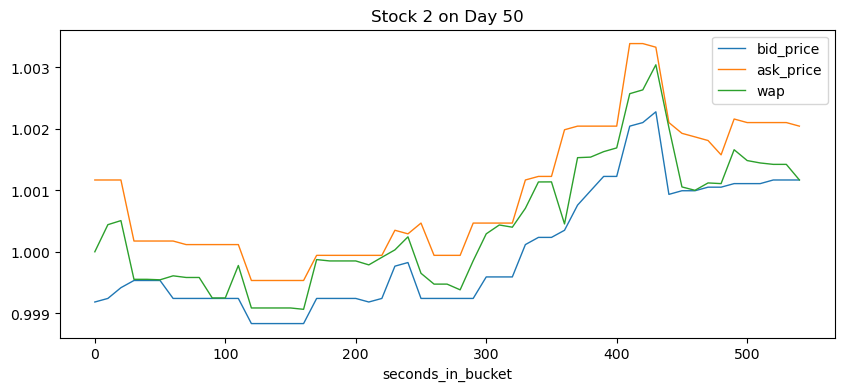

In [71]:
time_series_plot(
    df=df_tr,
    cols=['bid_price','ask_price', 'wap'],
    stock_id=2,
    date_id=50
)

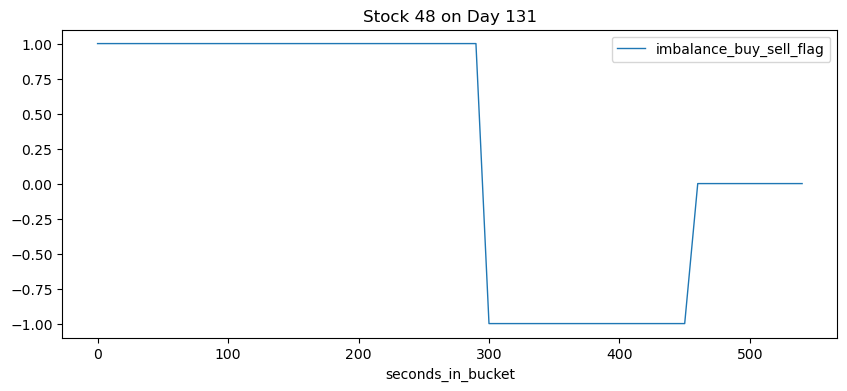

In [32]:
#随机一天，一支股票的imbalance_buy_sell_flag
time_series_plot(
    df=df_tr, 
    cols=['imbalance_buy_sell_flag'], 
    stock_id = np.random.randint(low=0, high=200), 
    date_id = np.random.randint(low=0, high=480),
)

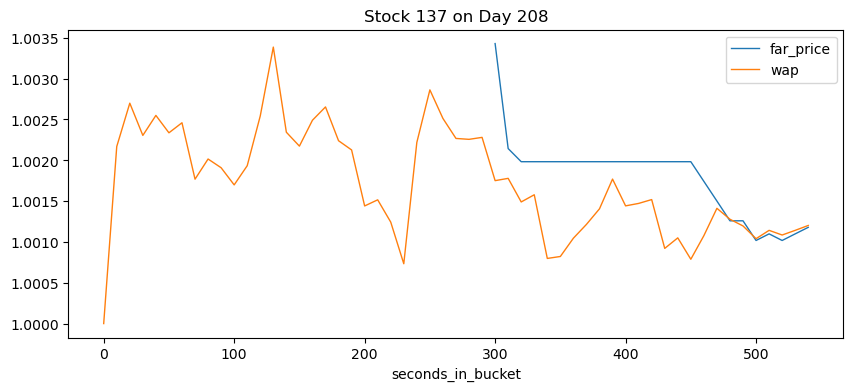

In [33]:
# Compare the far_price and wap
time_series_plot(
    df=df_tr, 
    cols=['far_price', 'wap'],
    stock_id = np.random.randint(low=0, high=200), 
    date_id = np.random.randint(low=0, high=480),
)

far_price最后会接近wap
far_price只在300后有数据

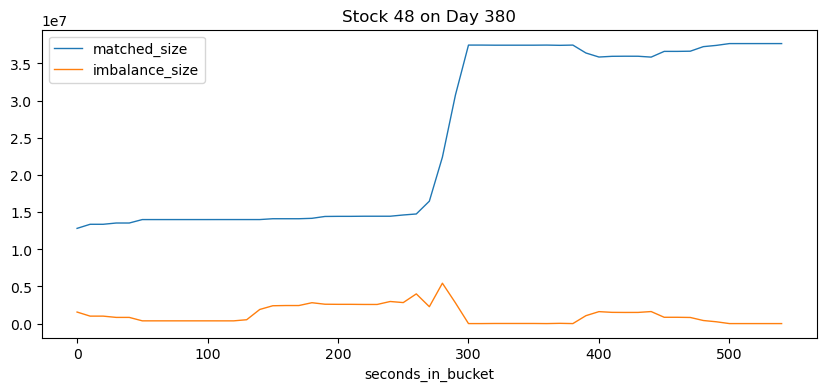

In [34]:
time_series_plot(
    df=df_tr, 
    cols=['matched_size', 'imbalance_size'], 
    stock_id = np.random.randint(low=0, high=200), 
    date_id = np.random.randint(low=0, high=480),
)

matched_size:大部分随着时间涨（300后）
imbalance_size: 大部分随着时间跌（300后）

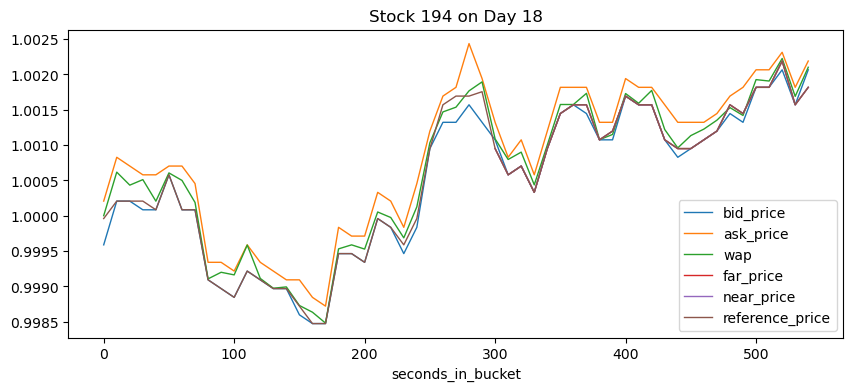

In [35]:
time_series_plot(
    df=df_tr, 
    cols=['bid_price', 'ask_price', 'wap', 'far_price', 'near_price', 'reference_price'], 
    stock_id = np.random.randint(low=0, high=200), 
    date_id = np.random.randint(low=0, high=480),
)

寻找错误值：All price related columns are **converted to a price move relative to the stock wap** (weighted average price) at the beginning of the auction period.
由于所有的价格都刚开始转换为相对于wap的价格，因此时刻0的时候的价格应该wap都是1

In [36]:
df_tr.query("seconds_in_bucket==0").query("wap!=1")

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
369508,131,35,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1925,35_0_131
3555081,101,328,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,18040,328_0_101
4215138,158,388,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21340,388_0_158
4764999,19,438,0,NaN,-1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,24090,438_0_19


#需要把这几个NAN的值都填成1吗？

In [37]:
df_tr.query("wap.isna()").query("stock_id==131").count()#第35天这支股票没有数据

stock_id                   55
date_id                    55
seconds_in_bucket          55
imbalance_size              0
imbalance_buy_sell_flag    55
reference_price             0
matched_size                0
far_price                   0
near_price                  0
bid_price                   0
bid_size                   55
ask_price                   0
ask_size                   55
wap                         0
target                     24
time_id                    55
row_id                     55
dtype: int64

In [38]:
df_tr.query("wap.isna()").query("stock_id==101").count()#在第328天没有数据

stock_id                   55
date_id                    55
seconds_in_bucket          55
imbalance_size              0
imbalance_buy_sell_flag    55
reference_price             0
matched_size                0
far_price                   0
near_price                  0
bid_price                   0
bid_size                   55
ask_price                   0
ask_size                   55
wap                         0
target                     54
time_id                    55
row_id                     55
dtype: int64

In [39]:
df_tr.query("wap.isna()").query("stock_id==158").count()#第388天这支股票没有数据

stock_id                   55
date_id                    55
seconds_in_bucket          55
imbalance_size              0
imbalance_buy_sell_flag    55
reference_price             0
matched_size                0
far_price                   0
near_price                  0
bid_price                   0
bid_size                   55
ask_price                   0
ask_size                   55
wap                         0
target                      0
time_id                    55
row_id                     55
dtype: int64

In [40]:
df_tr.query("wap.isna()").query("stock_id==19").count()#第438天这支股票没有数据

stock_id                   55
date_id                    55
seconds_in_bucket          55
imbalance_size              0
imbalance_buy_sell_flag    55
reference_price             0
matched_size                0
far_price                   0
near_price                  0
bid_price                   0
bid_size                   55
ask_price                   0
ask_size                   55
wap                         0
target                     54
time_id                    55
row_id                     55
dtype: int64

In [41]:
#看
mathed_size0=df_tr.groupby(["stock_id","date_id"])["matched_size"].describe()

KeyboardInterrupt: 

target：衡量某只股票在未来 60 秒内的加权平均价格（WAP）变动，减去一个由纳斯达克股票构建的合成指数在相同时间段内的加权平均价格变动。该指标的单位是基点（basis points），用于评估股票相对于市场表现的超额收益。
预测目标是target

第三步：初步实践

In [14]:
import pandas as pd 
def generate_features(df):
    features = ['seconds_in_bucket', 'imbalance_buy_sell_flag',
               'imbalance_size', 'matched_size', 'bid_size', 'ask_size',
                'reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap',
                'imb_s1', 'imb_s2'
               ]
    
    df['imb_s1'] = df.eval('(bid_size-ask_size)/(bid_size+ask_size)')
    df['imb_s2'] = df.eval('(imbalance_size-matched_size)/(matched_size+imbalance_size)')
    
    prices = ['reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap']
    
    for i,a in enumerate(prices):
        for j,b in enumerate(prices):
            if i>j:
                df[f'{a}_{b}_imb'] = df.eval(f'({a}-{b})/({a}+{b})')
                features.append(f'{a}_{b}_imb')    
                    
    for i,a in enumerate(prices):
        for j,b in enumerate(prices):
            for k,c in enumerate(prices):
                if i>j and j>k:
                    max_ = df[[a,b,c]].max(axis=1)
                    min_ = df[[a,b,c]].min(axis=1)
                    mid_ = df[[a,b,c]].sum(axis=1)-min_-max_

                    df[f'{a}_{b}_{c}_imb2'] = (max_-mid_)/(mid_-min_)
                    features.append(f'{a}_{b}_{c}_imb2')
    
    return df[features]

    # TRAINING = True
    # df['imb_s1'] = df.eval('(bid_size-ask_size)/(bid_size+ask_size)')
    # df['imb_s2'] = df.eval('(imbalance_size-matched_size)/(matched_size+imbalance_size)')
    
    # prices = ['reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap']
    
    # for i,a in enumerate(prices):
    #     for j,b in enumerate(prices):
    #         if i>j:
    #             df[f'{a}_{b}_imb'] = df.eval(f'({a}-{b})/({a}+{b})')
    #             features.append(f'{a}_{b}_imb')    
                    
    # for i,a in enumerate(prices):
    #     for j,b in enumerate(prices):
    #         for k,c in enumerate(prices):
    #             if i>j and j>k:
    #                 max_ = df[[a,b,c]].max(axis=1)
    #                 min_ = df[[a,b,c]].min(axis=1)
    #                 mid_ = df[[a,b,c]].sum(axis=1)-min_-max_

    #                 df[f'{a}_{b}_{c}_imb2'] = (max_-mid_)/(mid_-min_)
    #                 features.append(f'{a}_{b}_{c}_imb2')
    
    # return df[features]

TRAINING = True
if TRAINING:
    df_train = pd.read_csv('train.csv')
    df_ = generate_features(df_train)

In [15]:
import lightgbm as lgb 
import xgboost as xgb 
import catboost as cbt 
import numpy as np 
import joblib 
import os 

os.system('mkdir models')

model_path ='./model1'

N_fold = 5

if TRAINING:
    X = df_.values
    Y = df_train['target'].values

    X = X[np.isfinite(Y)]
    Y = Y[np.isfinite(Y)]

    index = np.arange(len(X))

models = []

def train(model_dict, modelname='lgb'):
    if TRAINING:
        model = model_dict[modelname]
        model.fit(X[index%N_fold!=i], Y[index%N_fold!=i], 
                    eval_set=[(X[index%N_fold==i], Y[index%N_fold==i])]
                    )
        models.append(model)
        joblib.dump(model, './models/{modelname}_{i}.model')
    else:
        models.append(joblib.load(f'{model_path}/{modelname}_{i}.model'))
    return 

model_dict = {
    'lgb': lgb.LGBMRegressor(objective='regression_l1', n_estimators=500),
    'xgb': xgb.XGBRegressor(tree_method='hist', objective='reg:absoluteerror', n_estimators=500),
    'cbt': cbt.CatBoostRegressor(objective='MAE', iterations=3000),

}

for i in range(N_fold):
    train(model_dict, 'lgb')
#     train(model_dict, 'xgb')
    train(model_dict, 'cbt')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.257848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12043
[LightGBM] [Info] Number of data points in the train set: 4190313, number of used features: 49
[LightGBM] [Info] Start training from score -0.060201
0:	learn: 6.3764794	test: 6.5089182	best: 6.5089182 (0)	total: 500ms	remaining: 24m 58s
1:	learn: 6.3724043	test: 6.5044511	best: 6.5044511 (1)	total: 791ms	remaining: 19m 46s
2:	learn: 6.3685112	test: 6.5001587	best: 6.5001587 (2)	total: 1.08s	remaining: 17m 56s
3:	learn: 6.3644671	test: 6.4956157	best: 6.4956157 (3)	total: 1.37s	remaining: 17m 7s
4:	learn: 6.3606835	test: 6.4914598	best: 6.4914598 (4)	total: 1.66s	remaining: 16m 36s
5:	learn: 6.3571130	test: 6.4875317	best: 6.4875317 (5)	total: 1.95s	remaining: 16m 10s
6:	learn: 6.3538510	test: 6.4839601	best: 6.4839601 (6)	total: 2.24s	remaining: 15m 58s
7:	learn: 6.3505458	test: 6.4803094	bes